In [2]:
import numpy as np
import ROOT as r

rng = r.TRandom3()

nums = []
for i in range(0, 10000):
    s = []
    for j in range(0,1000):
        s.append(rng.Uniform(1))
    nums.append(s)

numarray = np.array(nums)


Welcome to JupyROOT 6.26/08


In [3]:
means = []
for i in range(0, 10000):
    for j in range(0, 1000):
        means.append(numarray[i].mean())       

In [5]:
stdDevs = []
for i in range(0, 10000):
    for j in range(0, 1000):
        stdDevs.append(numarray[i].std()) 

In [15]:
histogramData = r.TH1F("Stats", "A histogram of data", 20, 0, 1)

for i in range(0,10000):
    for j in range(0, 1000):
        histogramData.Fill(nums[i][j])
r.gStyle.SetOptFit(1)
histogramData.Draw()       

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=20.1461 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=1.09617e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.04216e-05   6.33059e-04   7.10044e-07   1.48053e-02
   2  Slope       -1.64867e-04   1.09687e-03   1.23025e-06   7.45751e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


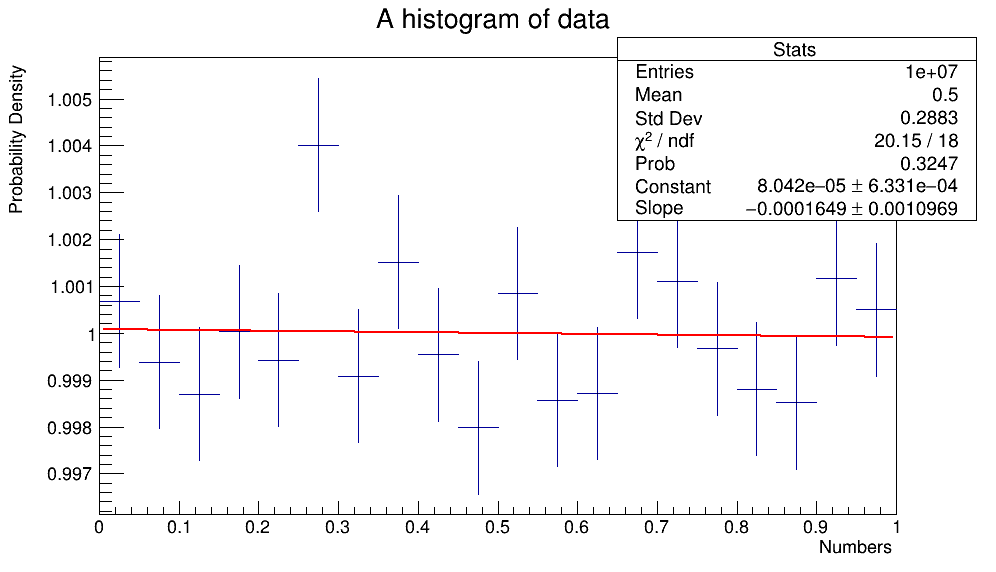

In [71]:
histogramData.Fit("expo")
histogramData.GetXaxis().SetTitle("Numbers")
histogramData.GetYaxis().SetTitle("Probability Density")
histogramData.Scale(1/histogramData.Integral(), "width")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
histogramData.Draw()
c.Update()
c.Draw()

In [154]:
meanData = r.TH1F("Stats", "A histogram of mean", 70, 0, 1)
meanData.GetXaxis().SetTitle("Numbers")
meanData.GetYaxis().SetTitle("Probability Density")
for i in range(0,10000):
    meanData.Fill(means[i]) 

r.gStyle.SetOptFit(1111)   

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=7.46687e-11 FROM MIGRAD    STATUS=CONVERGED      74 CALLS          75 TOTAL
                     EDM=1.4937e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.70033e+03   7.59839e+01   2.78320e-02   2.20094e-07
   2  Mean         5.01739e-01   1.39906e-04   2.39248e-07   9.37835e-02
   3  Sigma        1.05529e-02   1.30364e-04   1.46593e-06   5.38464e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


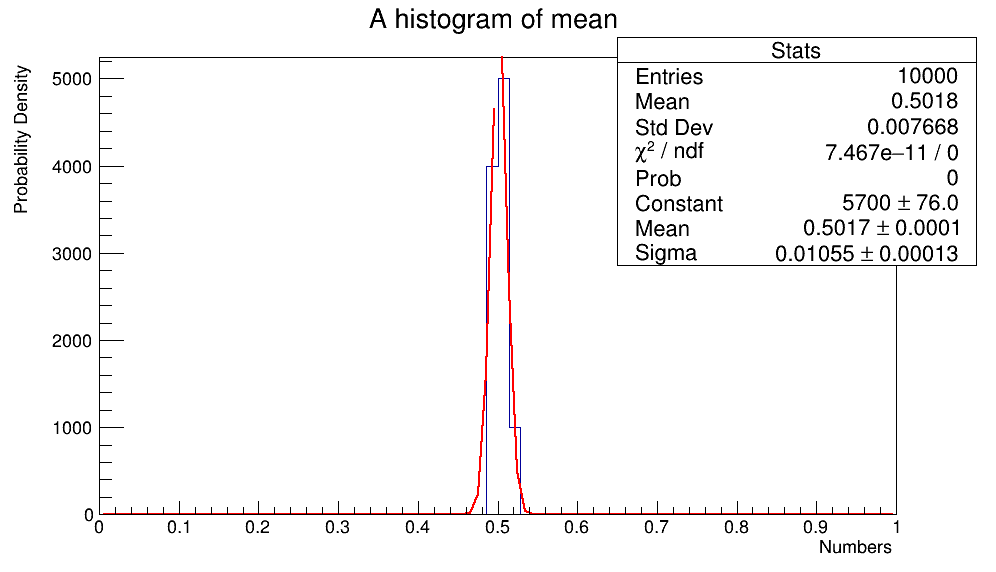

In [155]:
meanData.Fit("gaus")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
meanData.Draw()
c.Update()
c.Draw()

In [111]:
stdData = r.TH1F("Stats", "A histogram of Standard Devs", 70, 0, 1)
stdData.GetXaxis().SetTitle("Numbers")
stdData.GetYaxis().SetTitle("Probability Density")

for i in range(0,10000):
    stdData.Fill(stdDevs[i]) 

r.gStyle.SetOptFit(1111)  

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=3.33686e-09 FROM HESSE     STATUS=NOT POSDEF     16 CALLS          94 TOTAL
                     EDM=6.66626e-09    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.19293e+04   1.79212e+03   1.16471e-02   9.63135e-07
   2  Mean         2.89255e-01   6.36816e-04   6.89638e-08   8.58849e-01
   3  Sigma        4.79812e-03   4.31161e-04   2.11820e-07   3.69499e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


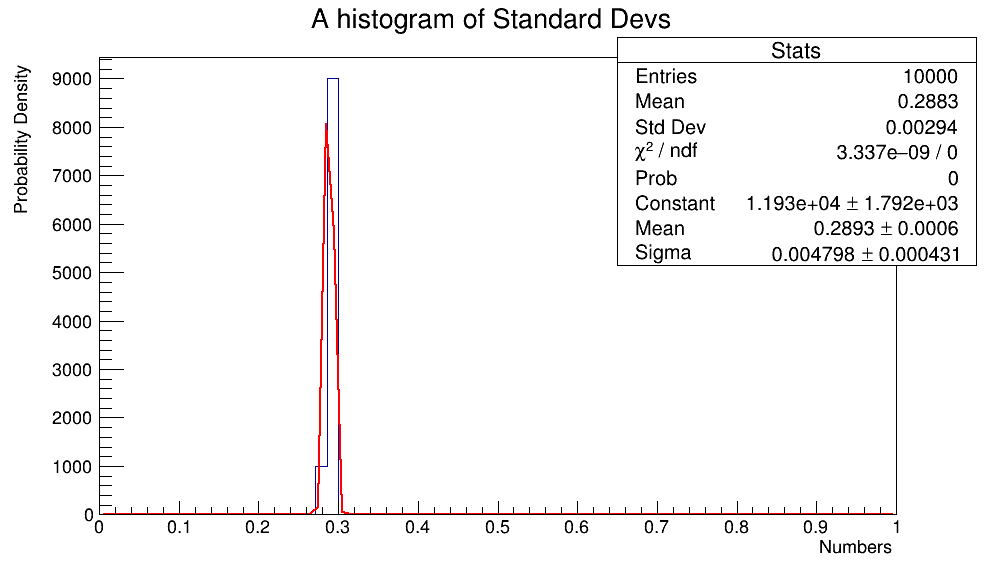

In [113]:
stdData.Fit("gaus")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
stdData.Draw()
c.Update()
c.Draw()

In [158]:
import math

meData = r.TH1F("Stats", "A histogram of Error in Mean", 70, 0, 0.01)
meData.GetXaxis().SetTitle("Numbers")
meData.GetYaxis().SetTitle("Probability Density")

for i in range(0,10000):
    meData.Fill(stdDevs[i]/math.sqrt(10000)) 

r.gStyle.SetOptStat(1111)  

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=3.33677e-09 FROM HESSE     STATUS=NOT POSDEF     16 CALLS          94 TOTAL
                     EDM=6.66606e-09    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.19293e+04   1.79212e+03   1.16471e-02   9.63121e-07
   2  Mean         2.89255e-03   6.36815e-06   6.89638e-10   8.58840e+01
   3  Sigma        4.79812e-05   4.31161e-06   2.11820e-07   3.69493e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


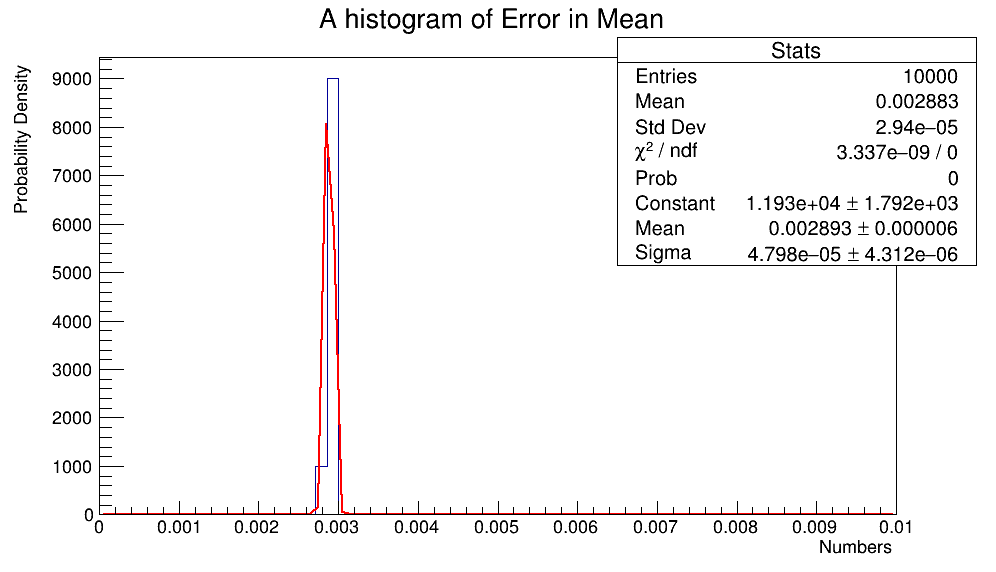

In [159]:
meData.Fit("gaus")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
meData.Draw()
c.Update()
c.Draw()